#0 Introduction

In this notebook, I built models which predict the ripness of tomato. I tried some deep learning models and KNN.
<br/>
I use these criteria to evalute the models
<br/>
accuracy：　　The probability that the predictions = acutural ripenesses. <br/>
accuracy１：　The probability that the absolute value of predictions  - acutural ripenesses <=1<br/>
accuracy２：　The probability that the absolute value of predictions  - acutural ripenesses <=2<br/>
MAE:   　  Mean Abusolute Error<br/>
Precision:　The probablity that actural ripeness is x when the prediction is x. <br/>
Recall:　 The probability that the prediction is x when actual ripeness is x. 

<br/>




#１Load data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import warnings
from google.colab import drive
from tqdm.notebook import tqdm


warnings.simplefilter('ignore')

In [ ]:
#unzip
drive.mount('/content/drive')
!unzip "train data"
!unzip "test data"

In [3]:
train_file = pd.read_csv('csv/datasets.csv')
train_file

,image,texture,ripeness
0,data/2e49d985fd7165ddd8c021dee9b594aa_08/image...,data/2e49d985fd7165ddd8c021dee9b594aa_08/textu...,8
1,data/6478a63cbfec05b24fbdb3c223bef981_02/image...,data/6478a63cbfec05b24fbdb3c223bef981_02/textu...,2
2,data/1808bef3db9deefb20c6a8873119363f_11/image...,data/1808bef3db9deefb20c6a8873119363f_11/textu...,11
3,data/c0fca39c4f230c5414bd06e14f8261e3_11/image...,data/c0fca39c4f230c5414bd06e14f8261e3_11/textu...,11
4,data/44c0512fbc8df3e26e5de97728b19062_07/image...,data/44c0512fbc8df3e26e5de97728b19062_07/textu...,7
...,...,...,...
13025,data/60bb2799af13a315295e85dcde296422_11/image...,data/60bb2799af13a315295e85dcde296422_11/textu...,11
13026,data/13d9547798e5d179541eddef803b8842_12/image...,data/13d9547798e5d179541eddef803b8842_12/textu...,12
13027,data/41eefa027c734738b4633e8170766fa1_02/image...,data/41eefa027c734738b4633e8170766fa1_02/textu...,2
13028,data/a0339cb0828baf538215ae3ec081f039_03/image...,data/a0339cb0828baf538215ae3ec081f039_03/textu...,3


In [4]:
real_file = pd.read_csv("real_ripeness.csv")
real_file

,path,day,position,day_idx,ripeness,idx
0,10_real_test_data/day_2_01_0_img_tomato_11_3.npz,2,1,0,11,3
1,10_real_test_data/day_2_01_0_img_tomato_6_8.npz,2,1,0,6,8
2,10_real_test_data/day_2_01_0_img_tomato_7_10.npz,2,1,0,7,10
3,10_real_test_data/day_2_01_0_img_tomato_7_7.npz,2,1,0,7,7
4,10_real_test_data/day_2_01_0_img_tomato_9_11.npz,2,1,0,9,11
...,...,...,...,...,...,...
203,10_real_test_data/day_3_12_1_img_tomato_11_3.npz,3,12,1,11,3
204,10_real_test_data/day_3_12_1_img_tomato_7_1.npz,3,12,1,7,1
205,10_real_test_data/day_3_12_1_img_tomato_8_5.npz,3,12,1,8,5
206,10_real_test_data/day_3_12_1_img_tomato_9_2.npz,3,12,1,9,2


#2 EDA

##2.1 ripeness statistics

count    13030.000000
mean         6.967076
std          3.736227
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         13.000000
Name: ripeness, dtype: float64

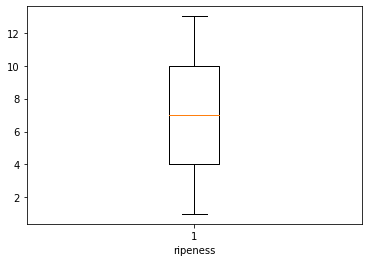

In [5]:
plt.boxplot(train_file['ripeness'])
plt.xlabel('ripeness')
train_file['ripeness'].describe()

ripeness
1     1034
2     1027
3      932
4     1013
5     1000
6     1070
7     1036
8      968
9      985
10    1023
11     949
12    1014
13     979
dtype: int64

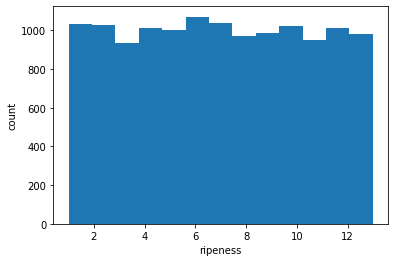

In [6]:
plt.hist(train_file['ripeness'],bins=13)
plt.xlabel('ripeness')
plt.ylabel('count')
train_file.groupby('ripeness').size()

Ripeness is uniformally distributed. Mininum is 1 and maximum is 13.

In [7]:
real_file.groupby('ripeness').size()

ripeness
5      3
6     21
7     38
8     24
9     51
10    26
11    41
12     4
dtype: int64

##2.2 show images

In [8]:
#show 10 images
def show_image(file, variable):
    fig = plt.figure(figsize=(7,3))
    for i in range(10):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        ax.set_title('ripeness: ' + str(file["ripeness"][i]))
        img=np.load(file[variable][i])
        for item in img:
            img=img[item]
        plt.imshow(img)
   

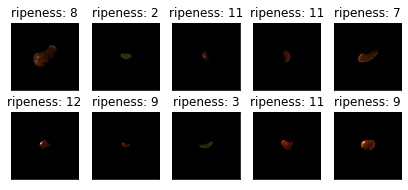

In [9]:
#images in training data
show_image(train_file,'image')

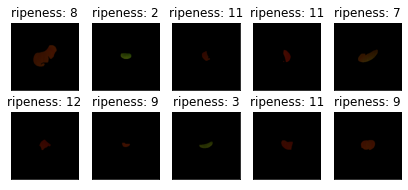

In [10]:
#texture in training data
show_image(train_file,'texture')

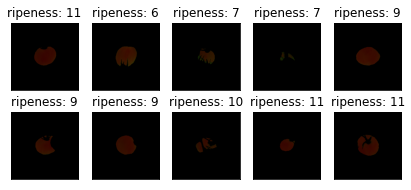

In [11]:
#images in real data
show_image(real_file,'path')

I use texture data for training and real data for testing data.

##2.3 Make the images tensor

Use transforms.CenterCrop(32) to avoid crashing


In [5]:

# #of images
n=len(train_file)
train1=[0]*n
train2=[0]*n
label_map={}
for i in range(13):
    label_map[i+1]=i

preprocess = transforms.Compose([transforms.CenterCrop(32)])

for i in tqdm(range(n)):
    img=torch.tensor(np.load(train_file["texture"][i])['arr_0']).permute(2,0,1)
    img=preprocess(img)
    train1[i]=[img.contiguous().view(-1),label_map[train_file["ripeness"][i]]]
    train2[i]=[img,label_map[train_file["ripeness"][i]]]


  0%|          | 0/13030 [00:00<?, ?it/s]

In [13]:
#Compute mean and sd for 3 colors (RGB).
imgs = torch.stack([img for img, _ in train2], dim=3)
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.1511, 0.0833, 0.0076]), tensor([0.0969, 0.0848, 0.0162]))

In [14]:
#Max and Min of each colors
imgs.view(3, -1).min(dim=1)[0], imgs.view(3, -1).max(dim=1)[0]

(tensor([0., 0., 0.]), tensor([0.4012, 0.4055, 0.2561]))

#３Model

## 3.1 Preparation

In [5]:
n=len(train_file)
train1=[0]*n
train2=[0]*n
label_map={}
for i in range(13):
    label_map[i+1]=i

preprocess = transforms.Compose([transforms.CenterCrop(32)])

for i in tqdm(range(n)):
    img=torch.tensor(np.load(train_file["texture"][i])['arr_0']).permute(2,0,1)
    img=preprocess(img)
    train1[i]=[img.contiguous().view(-1),label_map[train_file["ripeness"][i]]]
    train2[i]=[img,label_map[train_file["ripeness"][i]]]

  0%|          | 0/13030 [00:00<?, ?it/s]

In [6]:
#real data

n=len(real_file)
real1=[0]*n
real2=[0]*n
label_map={}
for i in range(13):
    label_map[i+1]=i
    
preprocess = transforms.Compose([transforms.CenterCrop(32)])
   
                    
for i in tqdm(range(n)):
    img=torch.tensor(np.load(real_file["path"][i])['arr_0']).permute(2,0,1)
    img=preprocess(img)
    real1[i]=[img.contiguous().view(-1),label_map[real_file['ripeness'][i]]]
    real2[i]=[img,label_map[real_file["ripeness"][i]]]

 

  0%|          | 0/208 [00:00<?, ?it/s]

In [7]:
train_size=10000
test_size=3030
train_set1,test_set1=train_test_split(train1,train_size=train_size,test_size=test_size, random_state=12345)
train_set2,test_set2=train_test_split(train2,train_size=train_size,test_size=test_size, random_state=12345)

batch_size=100
train_loader1=torch.utils.data.DataLoader(train_set1,batch_size=batch_size,shuffle=True)
test_loader1=torch.utils.data.DataLoader(test_set1,batch_size=batch_size,shuffle=False)

train_loader2=torch.utils.data.DataLoader(train_set2,batch_size=batch_size,shuffle=True)
test_loader2=torch.utils.data.DataLoader(test_set2,batch_size=batch_size,shuffle=False)



In [8]:
real_loader1=torch.utils.data.DataLoader(real1,batch_size=208,shuffle=False)
real_loader2=torch.utils.data.DataLoader(real2,batch_size=208,shuffle=False)

In [9]:

def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

   

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        train_acc1 = 0
        train_acc2 = 0
        val_loss = 0
        val_acc = 0
        val_acc1 = 0
        val_acc2 = 0
        AE=0
        MAE=0

        
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)

            loss = criterion(outputs, labels)
            train_loss += loss.item()

            loss.backward()
            optimizer.step()

            predicted = torch.max(outputs, 1)[1]

            # count # of correct predictions
            train_acc += (predicted == labels).sum()
            train_acc1 += (abs(predicted - labels)<=1).sum()
            train_acc2 += (abs(predicted - labels)<=2).sum()


            # compute loss and accuracy
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count
            avg_train_acc1 = train_acc1 / count
            avg_train_acc2 = train_acc2 / count

  
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            
            outputs = net(inputs)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predicted = torch.max(outputs, 1)[1]
            
            val_acc += (predicted == labels).sum()
            val_acc1 += (abs(predicted - labels)<=1).sum()
            val_acc2 += (abs(predicted - labels)<=2).sum()

            # compute loss and accuracy
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
            avg_val_acc1 = val_acc1 / count
            avg_val_acc2 = val_acc2 / count
            
            #absolute error 
            AE+=abs(predicted-labels).sum()
            MAE=AE / count
            
            
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc,avg_train_acc1,avg_train_acc2, avg_val_acc1, avg_val_acc2, MAE])
        history = np.vstack((history, item))
    return history

In [10]:

def evaluate_history(history):
    print(f'Initial state: loss: {history[0,3]:.5f} accuracy: {history[0,4]:.5f}　accuracy 1: {history[0,7]:5f} accuracy 2: {history[0,8]:5f} MAE: {history[0,9]:5f}') 
    print(f'Final state: loss: {history[-1,3]:.5f} accuracy: {history[-1,4]:.5f} accuracy1: {history[-1,7]:5f} accuracy 2: {history[-1,8]:5f} MAE: {history[-1,9]:5f}')

    num_epochs = len(history)
    unit = num_epochs / 10

    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='train')
    plt.plot(history[:,0], history[:,3], 'k', label='validation')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('Learning Curve(loss)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='train')
    plt.plot(history[:,0], history[:,4], 'k', label='validation')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.title('Learning Curve(accuracy)')
    plt.legend()
    plt.show()

## 3.2 Neural Network (1 layer)

In [11]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3
    


In [14]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


img=torch.tensor(np.load(train_file["texture"][0])['arr_0']).permute(2,0,1)
img=preprocess(img)
n_input =  img.contiguous().view(-1).size()[0]

# output
n_output = 13

#   nodes in hidden layer
n_hidden = 128

net_nn1 = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.Adam(net_nn1.parameters(), lr=lr)
num_epochs = 20
history_nn1 = np.zeros((0,10))

history_nn1 = fit(net_nn1, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history_nn1)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.01363 acc: 0.43720 val_loss: 0.01117, val_acc: 0.50297


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.01048 acc: 0.54360 val_loss: 0.01109, val_acc: 0.54059


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.01015 acc: 0.54730 val_loss: 0.01095, val_acc: 0.53663


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.00979 acc: 0.56550 val_loss: 0.01077, val_acc: 0.52838


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.00961 acc: 0.57700 val_loss: 0.00943, val_acc: 0.58944


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.00961 acc: 0.57660 val_loss: 0.01041, val_acc: 0.54587


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.00926 acc: 0.59570 val_loss: 0.00929, val_acc: 0.61056


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.00907 acc: 0.60000 val_loss: 0.00997, val_acc: 0.57030


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.00926 acc: 0.59590 val_loss: 0.00999, val_acc: 0.56040


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.00905 acc: 0.60730 val_loss: 0.00945, val_acc: 0.60759


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.00891 acc: 0.61590 val_loss: 0.00934, val_acc: 0.58845


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.00876 acc: 0.61760 val_loss: 0.00976, val_acc: 0.58713


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.00861 acc: 0.63150 val_loss: 0.00962, val_acc: 0.58119


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.00860 acc: 0.62490 val_loss: 0.00964, val_acc: 0.61122


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.00863 acc: 0.62640 val_loss: 0.01063, val_acc: 0.55578


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.00879 acc: 0.62540 val_loss: 0.00946, val_acc: 0.60594


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.00822 acc: 0.64840 val_loss: 0.00936, val_acc: 0.59373


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.00816 acc: 0.64830 val_loss: 0.00981, val_acc: 0.59604


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.00816 acc: 0.64530 val_loss: 0.00954, val_acc: 0.60726


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.00820 acc: 0.64470 val_loss: 0.00931, val_acc: 0.60858


Initial state: loss: 0.01117 accuracy: 0.50297　accuracy 1: 0.822112 accuracy 2: 0.964356 MAE: 0.714851
Final state: loss: 0.00931 accuracy: 0.60858 accuracy1: 0.886799 accuracy 2: 0.982178 MAE: 0.525413


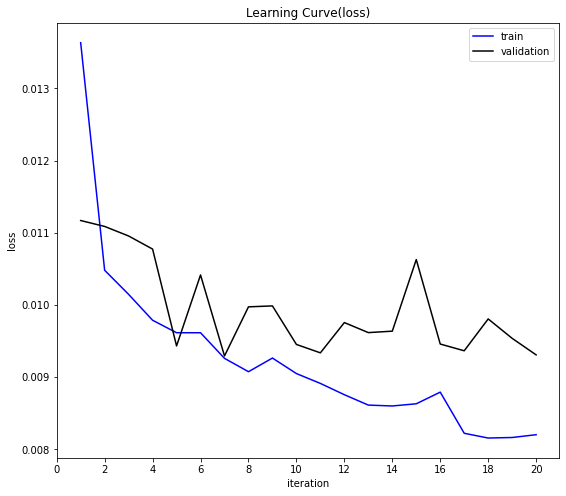

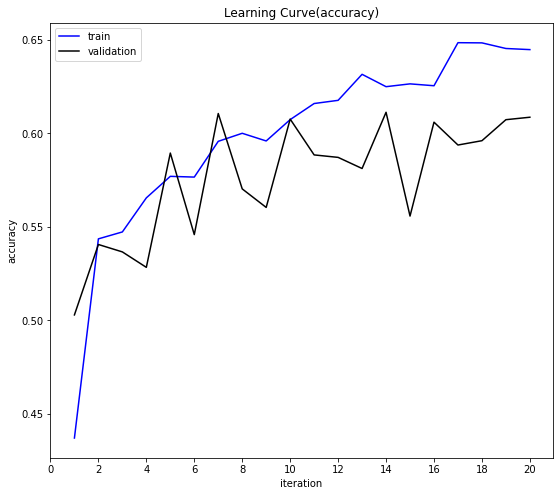

In [15]:
evaluate_history(history_nn1)

###3.2.1 Real data prediction

In [16]:
for images,labels in real_loader1:
    break
outputs=net_nn1(images)
accuracy_nn1=(abs(torch.max(outputs, 1)[1]-labels)<=0).sum()/len(labels)
accuracy1_nn1=(abs(torch.max(outputs, 1)[1]-labels)<=1).sum()/len(labels)
accuracy2_nn1=(abs(torch.max(outputs, 1)[1]-labels)<=2).sum()/len(labels)
MAE_nn1=(abs(torch.max(outputs, 1)[1]-labels)).sum()/len(labels)
print('Real data accuracy(NN１)')
print(f'accuracy：{accuracy_nn1:.5f} ')
print(f'accuracy 1：{accuracy1_nn1:.5f}')
print(f'accuracy 2：{accuracy2_nn1:.5f}')
print(f'MAE: {MAE_nn1:.5f}')

Real data accuracy(NN１)
accuracy：0.21154 
accuracy 1：0.55769
accuracy 2：0.83654
MAE: 1.51923


In [17]:

precision_recall_nn1=np.zeros((8,2))
for i in range(8):
 #precision for ripeness=i+5
    #(True Positive)
    numerator = torch.logical_and((torch.max(outputs, 1)[1] == i + 4), labels == i + 4 ).sum() 
    #the total number of predictions fori+5
    denominator_precision = (torch.max(outputs, 1)[1] == i + 4).sum()
    #the total number of actual ripeness = i+5
    denominator_recall = (labels == i+4 ).sum()
    #ripeness is i+5のprecision
    precision_recall_nn1[i,0] = float(numerator/denominator_precision)
    #ripeness is i+5のrecall
    precision_recall_nn1[i,1] = float(numerator/denominator_recall)

print('Precision and Recall by NN 1 ')
pd.DataFrame(precision_recall_nn1,
             columns=['precision','recall'],
            index=[5,6,7,8,9,10,11,12])

Precision and Recall by NN 1 


,precision,recall
5,0.000000,0.000000
6,0.409091,0.428571
7,0.000000,0.000000
8,0.205128,0.333333
9,0.291667,0.137255
10,0.166667,0.115385
11,0.303571,0.414634
12,0.000000,0.000000


##3.3 Neural Network (2 layers)

In [18]:
class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden1,n_hidden2):
        super().__init__()
        
        
        self.l1 = nn.Linear(n_input, n_hidden1)
        self.l2 = nn.Linear(n_hidden1, n_hidden2)
        self.l3 = nn.Linear(n_hidden2, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [19]:

torch.manual_seed(123)
torch.cuda.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Input
img=torch.tensor(np.load(train_file["texture"][0])['arr_0']).permute(2,0,1)
img=preprocess(img)
n_input =  img.contiguous().view(-1).size()[0]

# output
n_output = 13

#   nodes in the hidden layer
n_hidden1=128
n_hidden2=16
net_nn2 = Net2(n_input, n_output, n_hidden1,n_hidden2).to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.Adam(net_nn2.parameters(), lr=lr)
num_epochs = 20
history_nn2 = np.zeros((0,10))

history_nn2 = fit(net_nn2, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history_nn2)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.01551 acc: 0.36690 val_loss: 0.01092, val_acc: 0.52706


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.01098 acc: 0.51260 val_loss: 0.01193, val_acc: 0.48680


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.01034 acc: 0.54670 val_loss: 0.01042, val_acc: 0.55215


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.01027 acc: 0.54810 val_loss: 0.01045, val_acc: 0.57393


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.00983 acc: 0.56170 val_loss: 0.01020, val_acc: 0.52970


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.00979 acc: 0.57150 val_loss: 0.01005, val_acc: 0.56172


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.00951 acc: 0.58220 val_loss: 0.00997, val_acc: 0.58251


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.00945 acc: 0.58410 val_loss: 0.00985, val_acc: 0.56502


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.00900 acc: 0.60360 val_loss: 0.01012, val_acc: 0.57063


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.00884 acc: 0.61620 val_loss: 0.00947, val_acc: 0.60264


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.00889 acc: 0.61100 val_loss: 0.00944, val_acc: 0.57888


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.00911 acc: 0.59840 val_loss: 0.00963, val_acc: 0.59505


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.00885 acc: 0.61020 val_loss: 0.00938, val_acc: 0.60231


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.00889 acc: 0.61170 val_loss: 0.00914, val_acc: 0.60957


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.00859 acc: 0.61820 val_loss: 0.00907, val_acc: 0.61716


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.00847 acc: 0.62540 val_loss: 0.00928, val_acc: 0.61287


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.00849 acc: 0.62420 val_loss: 0.00925, val_acc: 0.60528


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.00848 acc: 0.63120 val_loss: 0.00930, val_acc: 0.58350


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.00827 acc: 0.63730 val_loss: 0.00951, val_acc: 0.60033


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.00812 acc: 0.64310 val_loss: 0.00961, val_acc: 0.59142


Initial state: loss: 0.01092 accuracy: 0.52706　accuracy 1: 0.906931 accuracy 2: 0.974917 MAE: 0.593399
Final state: loss: 0.00961 accuracy: 0.59142 accuracy1: 0.880858 accuracy 2: 0.986469 MAE: 0.542244


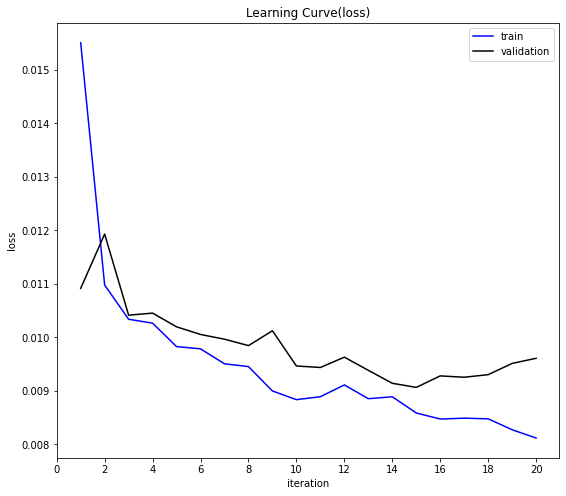

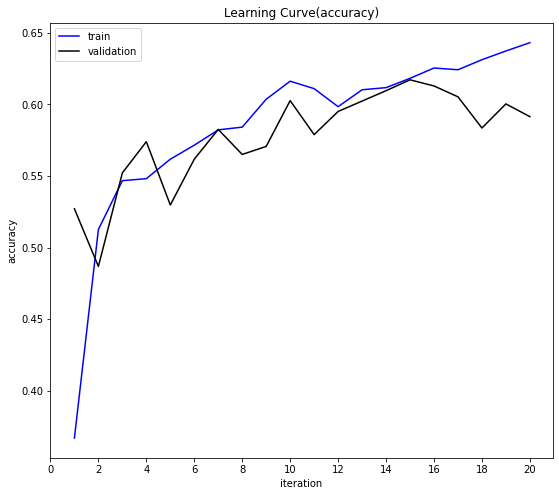

In [20]:
evaluate_history(history_nn2)

###3.3.1 Real data prediction

In [21]:
#Prediction for real data
for images,labels in real_loader1:
    break
outputs = net_nn2(images)
accuracy_nn2 = (abs(torch.max(outputs, 1)[1]-labels)<=0).sum()/len(labels)
accuracy1_nn2 = (abs(torch.max(outputs, 1)[1]-labels)<=1).sum()/len(labels)
accuracy2_nn2 = (abs(torch.max(outputs, 1)[1]-labels)<=2).sum()/len(labels)
MAE_nn2 = (abs(torch.max(outputs, 1)[1]-labels)).sum()/len(labels)
print('Accuracy by NN2')
print(f'accuracy：{accuracy_nn2:.5f} ')
print(f'accuracy 1：{accuracy1_nn2:.5f}')
print(f'accuracy 2：{accuracy2_nn2:.5f}')
print(f'MAE: {MAE_nn2:.5f}')

Accuracy by NN2
accuracy：0.25481 
accuracy 1：0.66827
accuracy 2：0.87981
MAE: 1.26923


In [22]:

precision_recall_nn2=np.zeros((8,2))
for i in range(8):
 #ripeness i+5 precision
    #(True Positive)
    numerator = torch.logical_and((torch.max(outputs, 1)[1] == i + 4), labels == i + 4 ).sum() 
    #the total number of predictions for i+5
    denominator_precision = (torch.max(outputs, 1)[1] == i + 4).sum()
    #the total number of actual ripeness = i+5
    denominator_recall = (labels == i+4 ).sum()
    #precision
    precision_recall_nn2[i,0] = float(numerator/denominator_precision)
    #recall
    precision_recall_nn2[i,1] = float(numerator/denominator_recall)

print('Precision and Recall by NN2')
pd.DataFrame(precision_recall_nn2,
             columns=['precision','recall'],
            index=[5,6,7,8,9,10,11,12])

Precision and Recall by NN2


,precision,recall
5,0.000000,0.000000
6,0.444444,0.380952
7,0.285714,0.052632
8,0.200000,0.375000
9,0.225806,0.137255
10,0.209302,0.346154
11,0.461538,0.439024
12,0.000000,0.000000


##3.4 CNN

Num_epochs=20 is because overfitting occured after 20.

In [23]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 32, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(6272, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool)
    
    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3       

In [24]:
#CNN

torch.manual_seed(123)
torch.cuda.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

n_hidden=128
n_output=13

net_cnn1 = CNN(n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.Adam(net_cnn1.parameters(), lr=lr)
num_epochs = 50
history_cnn1 = np.zeros((0,10))

# learning
history_cnn1 = fit(net_cnn1, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history_cnn1)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.01363 acc: 0.41940 val_loss: 0.01060, val_acc: 0.53630


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01021 acc: 0.52730 val_loss: 0.01067, val_acc: 0.51914


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.00979 acc: 0.54560 val_loss: 0.00994, val_acc: 0.54620


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.00963 acc: 0.56530 val_loss: 0.00976, val_acc: 0.55677


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.00941 acc: 0.57800 val_loss: 0.01067, val_acc: 0.55281


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.00924 acc: 0.59180 val_loss: 0.00874, val_acc: 0.61617


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.00908 acc: 0.59920 val_loss: 0.00947, val_acc: 0.58218


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.00881 acc: 0.60350 val_loss: 0.00932, val_acc: 0.58449


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.00826 acc: 0.63020 val_loss: 0.00821, val_acc: 0.63861


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.00825 acc: 0.63040 val_loss: 0.00834, val_acc: 0.62343


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.00805 acc: 0.64400 val_loss: 0.00825, val_acc: 0.63795


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.00818 acc: 0.64040 val_loss: 0.00862, val_acc: 0.63630


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.00792 acc: 0.65290 val_loss: 0.00886, val_acc: 0.62607


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00761 acc: 0.66760 val_loss: 0.00991, val_acc: 0.58944


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00781 acc: 0.66050 val_loss: 0.01014, val_acc: 0.60726


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00766 acc: 0.66840 val_loss: 0.00870, val_acc: 0.63168


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00713 acc: 0.68660 val_loss: 0.00899, val_acc: 0.62508


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00721 acc: 0.68070 val_loss: 0.00869, val_acc: 0.63927


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00694 acc: 0.69970 val_loss: 0.00926, val_acc: 0.61518


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00658 acc: 0.71740 val_loss: 0.00927, val_acc: 0.61881


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00659 acc: 0.71420 val_loss: 0.00981, val_acc: 0.61551


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00625 acc: 0.72770 val_loss: 0.00932, val_acc: 0.63498


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00644 acc: 0.73040 val_loss: 0.00985, val_acc: 0.63201


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00630 acc: 0.73300 val_loss: 0.01014, val_acc: 0.61683


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00599 acc: 0.74780 val_loss: 0.01064, val_acc: 0.62574


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00594 acc: 0.74430 val_loss: 0.01021, val_acc: 0.63135


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00567 acc: 0.75680 val_loss: 0.01152, val_acc: 0.61881


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00589 acc: 0.75240 val_loss: 0.01176, val_acc: 0.59670


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00536 acc: 0.76910 val_loss: 0.01156, val_acc: 0.61452


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00510 acc: 0.78170 val_loss: 0.01142, val_acc: 0.61386


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00567 acc: 0.76850 val_loss: 0.01170, val_acc: 0.62343


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00547 acc: 0.77070 val_loss: 0.01169, val_acc: 0.61188


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00490 acc: 0.79110 val_loss: 0.01269, val_acc: 0.62475


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00469 acc: 0.80290 val_loss: 0.01416, val_acc: 0.59175


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00498 acc: 0.79340 val_loss: 0.01371, val_acc: 0.62376


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00493 acc: 0.79140 val_loss: 0.01406, val_acc: 0.60891


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00463 acc: 0.80190 val_loss: 0.01374, val_acc: 0.60660


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00439 acc: 0.81520 val_loss: 0.01486, val_acc: 0.57921


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00438 acc: 0.81260 val_loss: 0.01398, val_acc: 0.62178


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00412 acc: 0.82470 val_loss: 0.01468, val_acc: 0.61518


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00429 acc: 0.82210 val_loss: 0.01472, val_acc: 0.61155


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00426 acc: 0.82120 val_loss: 0.01545, val_acc: 0.61353


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00447 acc: 0.81170 val_loss: 0.01561, val_acc: 0.60924


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00443 acc: 0.82180 val_loss: 0.01590, val_acc: 0.58482


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00416 acc: 0.82310 val_loss: 0.01633, val_acc: 0.61188


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00380 acc: 0.83860 val_loss: 0.01703, val_acc: 0.59571


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00397 acc: 0.83210 val_loss: 0.01632, val_acc: 0.60594


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00416 acc: 0.82540 val_loss: 0.01759, val_acc: 0.60363


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00400 acc: 0.83270 val_loss: 0.01684, val_acc: 0.60825


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00386 acc: 0.83710 val_loss: 0.01666, val_acc: 0.60924


Initial state: loss: 0.01060 accuracy: 0.53630　accuracy 1: 0.935644 accuracy 2: 0.992409 MAE: 0.537954
Final state: loss: 0.01666 accuracy: 0.60924 accuracy1: 0.890099 accuracy 2: 0.977558 MAE: 0.525743


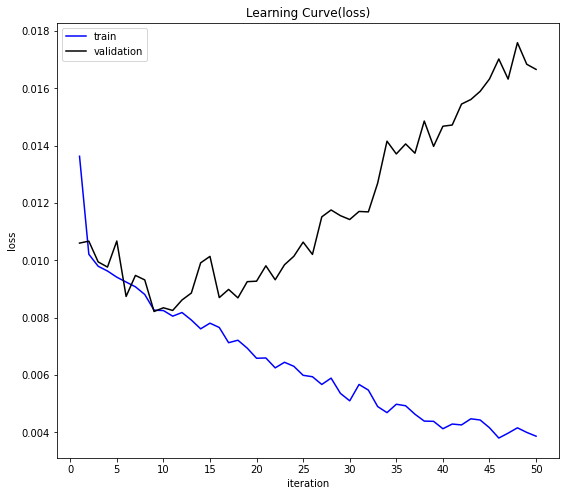

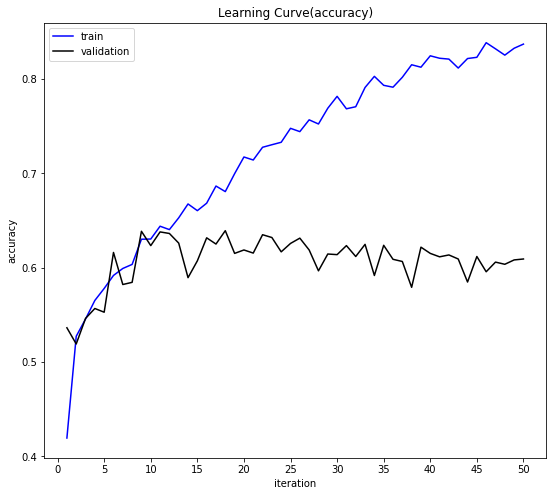

In [25]:
evaluate_history(history_cnn1)

###3.4.1 Real data prediction

In [26]:

for images,labels in real_loader2:
    break
outputs = net_cnn1(images)
accuracy_cnn1 = (abs(torch.max(outputs, 1)[1]-labels)<=0).sum()/len(labels)
accuracy1_cnn1 = (abs(torch.max(outputs, 1)[1]-labels)<=1).sum()/len(labels)
accuracy2_cnn1 = (abs(torch.max(outputs, 1)[1]-labels)<=2).sum()/len(labels)
MAE_cnn1 = (abs(torch.max(outputs, 1)[1]-labels)).sum()/len(labels)
print('Real data accuracy (NN2)')
print(f'accuracy：{accuracy_cnn1:.5f} ')
print(f'accuracy 1：{accuracy1_cnn1:.5f}')
print(f'accuracy 2：{accuracy2_cnn1:.5f}')
print(f'MAE: {MAE_cnn1:.5f}')

Real data accuracy (NN2)
accuracy：0.18269 
accuracy 1：0.50481
accuracy 2：0.75481
MAE: 1.73558


In [28]:

precision_recall_cnn1=np.zeros((8,2))
for i in range(8):
    #(True Positive)
    numerator = torch.logical_and((torch.max(outputs, 1)[1] == i + 4), labels == i + 4 ).sum() 
    # the total number of predictions for ripeness = i+5
    denominator_precision = (torch.max(outputs, 1)[1] == i + 4).sum()
    #the total number of ripeness = i+5
    denominator_recall = (labels == i+4 ).sum()
    #precision when ripeness = i+5
    precision_recall_cnn1[i,0] = float(numerator/denominator_precision)
    #recall when ripeness = i+5
    precision_recall_cnn1[i,1] = float(numerator/denominator_recall)

print('Precision and Recall by CNN')
pd.DataFrame(precision_recall_cnn1,
             columns=['precision','recall'],
            index=[5,6,7,8,9,10,11,12])

Precision and Recall by CNN


,precision,recall
5,0.250000,0.333333
6,0.275000,0.523810
7,0.250000,0.078947
8,0.100000,0.125000
9,0.285714,0.039216
10,0.142857,0.115385
11,0.285714,0.341463
12,0.058824,0.250000


##3.5 CNN2 


Make the model deeper and use batch Normalization and drop Out.

In [29]:
class CNN2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, 13)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [32]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


n_output=13
net_cnn2 = CNN2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.Adam(net_cnn2.parameters(), lr=lr)
num_epochs = 30


history_cnn2 = np.zeros((0,10))


history_cnn2 = fit(net_cnn2, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history_cnn2)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/30], loss: 0.02118 acc: 0.24360 val_loss: 0.02217, val_acc: 0.30924


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/30], loss: 0.01426 acc: 0.38820 val_loss: 0.01428, val_acc: 0.41980


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [3/30], loss: 0.01340 acc: 0.42360 val_loss: 0.01268, val_acc: 0.49010


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.01287 acc: 0.44060 val_loss: 0.01059, val_acc: 0.53597


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.01353 acc: 0.42420 val_loss: 0.01142, val_acc: 0.48944


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.01276 acc: 0.44510 val_loss: 0.01035, val_acc: 0.53696


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.01225 acc: 0.46060 val_loss: 0.01627, val_acc: 0.44686


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.01180 acc: 0.49450 val_loss: 0.01044, val_acc: 0.55016


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.01154 acc: 0.50640 val_loss: 0.01175, val_acc: 0.47822


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.01165 acc: 0.50190 val_loss: 0.01187, val_acc: 0.48317


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.01116 acc: 0.52160 val_loss: 0.00911, val_acc: 0.59802


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.01135 acc: 0.51730 val_loss: 0.01188, val_acc: 0.50858


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.01117 acc: 0.51930 val_loss: 0.00937, val_acc: 0.59241


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.01084 acc: 0.53950 val_loss: 0.01087, val_acc: 0.52574


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.01101 acc: 0.52790 val_loss: 0.00976, val_acc: 0.56766


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.01077 acc: 0.53600 val_loss: 0.01018, val_acc: 0.55314


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.01056 acc: 0.54610 val_loss: 0.00908, val_acc: 0.57459


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.01063 acc: 0.54360 val_loss: 0.00892, val_acc: 0.59736


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.01044 acc: 0.54880 val_loss: 0.01214, val_acc: 0.53696


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.01025 acc: 0.56110 val_loss: 0.00895, val_acc: 0.60165


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.01110 acc: 0.52670 val_loss: 0.01108, val_acc: 0.54620


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.01106 acc: 0.52040 val_loss: 0.00943, val_acc: 0.58317


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.01049 acc: 0.55290 val_loss: 0.00982, val_acc: 0.57822


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.01039 acc: 0.56060 val_loss: 0.00890, val_acc: 0.60561


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.01011 acc: 0.56800 val_loss: 0.00851, val_acc: 0.63201


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.00998 acc: 0.56860 val_loss: 0.00822, val_acc: 0.63960


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.00985 acc: 0.57090 val_loss: 0.01058, val_acc: 0.52244


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.00997 acc: 0.56940 val_loss: 0.00900, val_acc: 0.60330


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.01006 acc: 0.57430 val_loss: 0.00925, val_acc: 0.61716


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.00973 acc: 0.57730 val_loss: 0.00893, val_acc: 0.59670


Initial state: loss: 0.02217 accuracy: 0.30924　accuracy 1: 0.548845 accuracy 2: 0.693399 MAE: 1.716172
Final state: loss: 0.00893 accuracy: 0.59670 accuracy1: 0.899670 accuracy 2: 0.992739 MAE: 0.512541


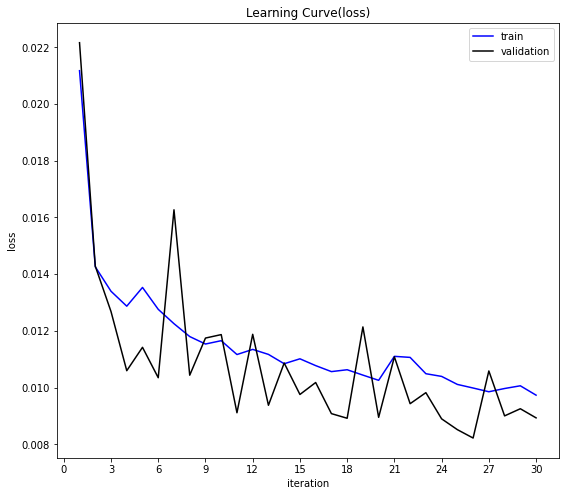

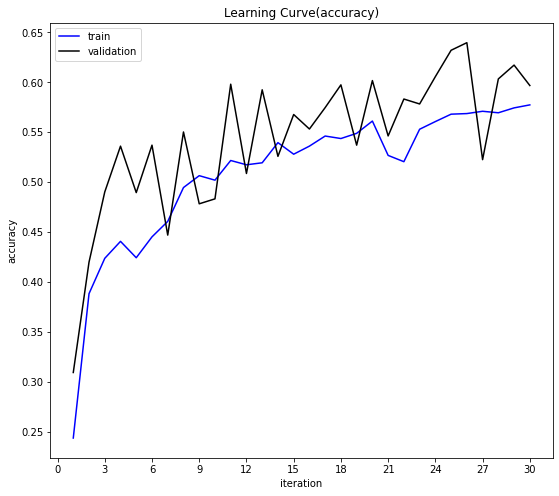

In [33]:
evaluate_history(history_cnn2)

###3.5.1 Real data prediction

In [34]:

for images,labels in real_loader2:
    break
outputs = net_cnn2(images)
accuracy_cnn2 = (abs(torch.max(outputs, 1)[1]-labels)<=0).sum()/len(labels)
accuracy1_cnn2 = (abs(torch.max(outputs, 1)[1]-labels)<=1).sum()/len(labels)
accuracy2_cnn2 = (abs(torch.max(outputs, 1)[1]-labels)<=2).sum()/len(labels)
MAE_cnn2 = (abs(torch.max(outputs, 1)[1]-labels)).sum()/len(labels)
print('Real data accuracy by CNN2')
print(f'accuracy：{accuracy_cnn2:.5f} ')
print(f'accuracy 1：{accuracy1_cnn2:.5f}')
print(f'accuracy 2：{accuracy2_cnn2:.5f}')
print(f'MAE: {MAE_cnn2:.5f}')

Real data accuracy by CNN2
accuracy：0.23077 
accuracy 1：0.58173
accuracy 2：0.82212
MAE: 1.49038


In [35]:

precision_recall_cnn2=np.zeros((8,2))
for i in range(8):

    #(True Positive)
    numerator = torch.logical_and((torch.max(outputs, 1)[1] == i + 4), labels == i + 4 ).sum() 
    #total number of predictions when ripeness = i+5
    denominator_precision = (torch.max(outputs, 1)[1] == i + 4).sum()
    #total number of ripeness = i+5
    denominator_recall = (labels == i+4 ).sum()
    #precision
    precision_recall_cnn2[i,0] = float(numerator/denominator_precision)
    #recall
    precision_recall_cnn2[i,1] = float(numerator/denominator_recall)

print('Precision and recall by CNN2')
pd.DataFrame(precision_recall_cnn2,
             columns=['precision','recall'],
            index=[5,6,7,8,9,10,11,12])

Precision and recall by CNN2


,precision,recall
5,NaN,0.000000
6,0.454545,0.476190
7,NaN,0.000000
8,0.133333,0.166667
9,0.266667,0.078431
10,0.194444,0.269231
11,0.287500,0.560976
12,0.000000,0.000000


#3.6 Ordinal regression (still in progress)



#3.7 KNN

I try KNN to predict the ripness
<br/>
Ignore 0 in the images and use the mean of each colors (RGB) for input.


In [36]:
# number of images
n=len(train_file)

X=[0]*n
y=[0]*n

#read data
for i in range(n):
  
    img=np.load(train_file["texture"][i])['arr_0']
    #ignore 0 and compute means for each colors (RGB)
    img0=np.delete(img[:,:,0].reshape(-1),img[:,:,0].reshape(-1)==0).mean()
    img1=np.delete(img[:,:,1].reshape(-1),img[:,:,1].reshape(-1)==0).mean()
    img2=np.delete(img[:,:,2].reshape(-1),img[:,:,2].reshape(-1)==0).mean()
    X[i]=[img0,img1,img2]
    y[i]=train_file["ripeness"][i]

  

X is 13030 by 3 matrix. Row is images. Column is the mean of RGB.

In [37]:
X

[[0.22177781, 0.07070337, 0.0005214132],
 [0.17920871, 0.2541536, 0.023992432],
 [0.19420157, 0.042878624, 0.0032458254],
 [0.24183257, 0.03340007, 0.002572465],
 [0.19399388, 0.10362296, 0.006662089],
 [0.2129828, 0.031465165, 0.0030858296],
 [0.21289964, 0.056216247, 0.0005869974],
 [0.16268949, 0.19792113, 0.014051453],
 [0.2084193, 0.034902144, 0.0007821724],
 [0.22979316, 0.06689851, 0.00026542394],
 [0.1548855, 0.13290606, 0.0059807515],
 [0.19404991, 0.17212018, 0.015743928],
 [0.11881686, 0.08941187, 0.0064893416],
 [0.2024905, 0.07308264, 0.0021512506],
 [0.2061992, 0.13185085, 0.008615686],
 [0.13509956, 0.2319488, 0.04701026],
 [0.12800658, 0.18673897, 0.0073207216],
 [0.17103727, 0.20324264, 0.01344914],
 [0.1834541, 0.019024746, 0.0008873227],
 [0.19215147, 0.19408698, 0.011961814],
 [0.20817535, 0.060745113, 0.0006778808],
 [0.1755332, 0.1399706, 0.015473342],
 [0.2543935, 0.15708157, 0.005606751],
 [0.28379884, 0.074819565, 0.0016101857],
 [0.1421204, 0.09082313, 0.00213

In [39]:
n=len(real_file)

X_real=[0]*n
y_real=np.zeros(n)


for i in range(n):
  
    img=np.load(real_file["path"][i])['arr_0']
    img0=np.delete(img[:,:,0].reshape(-1),img[:,:,0].reshape(-1)==0).mean()
    img1=np.delete(img[:,:,1].reshape(-1),img[:,:,1].reshape(-1)==0).mean()
    img2=np.delete(img[:,:,2].reshape(-1),img[:,:,2].reshape(-1)==0).mean()
    X_real[i]=[img0,img1,img2]
    y_real[i]=real_file["ripeness"][i]
        

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
#Normalization
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [42]:
n=range(1,10)
accuracy=[]
accuracy1=[]
accuracy2=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X_train_std,y_train)
    pred=knn.predict(X_test_std)
    
    pred=np.round(pred) 
    
    accuracy.append(sum(pred==y_test)/len(y_test))
    accuracy1.append(sum(abs(pred-y_test)<=1)/len(y_test))
    accuracy2.append(sum(abs(pred-y_test)<=2)/len(y_test))

pd.DataFrame({"n":n,
             "accuracy":accuracy,
             "accuracy 1":accuracy1,
             "accuracy 2":accuracy2})

,n,accuracy,accuracy 1,accuracy 2
0,1,0.695830,0.907137,0.981325
1,2,0.704528,0.902277,0.980558
2,3,0.711179,0.910719,0.979534
3,4,0.726273,0.918905,0.984907
4,5,0.723203,0.920952,0.984139
5,6,0.728575,0.917370,0.985674
6,7,0.725505,0.916091,0.985162
7,8,0.734203,0.919161,0.985930
8,9,0.727808,0.918138,0.985418


Set n_neighbors=4

###3.6.1 Real data prediction

In [43]:

X_real_std = sc.transform(X_real)
knn=KNeighborsClassifier(n_neighbors=4,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
pred=knn.predict(X_real_std)
accuracy_knn=(y_real==pred).sum()/len(y_real)
accuracy1_knn=(abs(y_real-pred)<=1).sum()/len(y_real)
accuracy2_knn=(abs(y_real-pred)<=2).sum()/len(y_real)
MAE_knn=abs(y_real-pred).sum()/len(y_real)



In [44]:

print(f'accuracy:  {accuracy_knn:.5f}')
print(f'accuracy 1: {accuracy1_knn:.5f}')
print(f'accuracy 2: {accuracy2_knn:.5f}')
print(f'MAE:   {MAE_knn:.5f}')

accuracy:  0.32692
accuracy 1: 0.70673
accuracy 2: 0.88462
MAE:   1.13942


In [45]:

precision_recall_knn=np.zeros((8,2))
for i in range(8):
    #(True Positive)
    numerator =np.logical_and(pred==i+5,y_real==i+5).sum()
    #the total number of predicitons when ripeness=i+5
    denominator_precision = (pred== i + 5).sum()
    #the total number of ripeness=i+5
    denominator_recall = (y_real == i+5 ).sum()
    #precision
    precision_recall_knn[i,0] = float(numerator/denominator_precision)
    #recall
    precision_recall_knn[i,1] = float(numerator/denominator_recall)

print('Precision and Recall by KNN')
pd.DataFrame(precision_recall_knn,
             columns=['precision','recall'],
            index=[5,6,7,8,9,10,11,12])

Precision and Recall by KNN


,precision,recall
5,0.000000,0.000000
6,0.264706,0.428571
7,0.375000,0.157895
8,0.214286,0.250000
9,0.437500,0.274510
10,0.195122,0.307692
11,0.609756,0.609756
12,0.000000,0.000000


#4 Summary

In [46]:
print("Accuracy of all models ")
pd.DataFrame({"accuracy":[float(accuracy_nn1),float(accuracy_nn2),float(accuracy_cnn1),float(accuracy_cnn2),float(accuracy_knn)],
             "accuracy １":[float(accuracy1_nn1),float(accuracy1_nn2),float(accuracy1_cnn1),float(accuracy1_cnn2),float(accuracy1_knn)],
             "accuracy ２":[float(accuracy2_nn1),float(accuracy2_nn2),float(accuracy2_cnn1),float(accuracy2_cnn2),float(accuracy2_knn)],
             "MAE":[float(MAE_nn1),float(MAE_nn2),float(MAE_cnn1),float(MAE_cnn2),float(MAE_knn)]},
              index=['NN1','NN2','CNN1','CNN2','KNN'])



Accuracy of all models 


,accuracy,accuracy １,accuracy ２,MAE
NN1,0.211538,0.557692,0.836538,1.519231
NN2,0.254808,0.668269,0.879808,1.269231
CNN1,0.182692,0.504808,0.754808,1.735577
CNN2,0.230769,0.581731,0.822115,1.490385
KNN,0.326923,0.706731,0.884615,1.139423


In [56]:
print("Precision")
precision = pd.DataFrame({"NN1": precision_recall_nn1[:,0],
              "NN2": precision_recall_nn2[:,0],
              "CNN1":precision_recall_cnn1[:,0],
              "CNN2":precision_recall_cnn2[:,0],
              "KNN":precision_recall_knn[:,0]},
              index=[5,6,7,8,9,10,11,12])
precision.index.name="Ripeness"
precision

Precision


,NN1,NN2,CNN1,CNN2,KNN
Ripeness,,,,,
5,0.000000,0.000000,0.250000,NaN,0.000000
6,0.409091,0.444444,0.275000,0.454545,0.264706
7,0.000000,0.285714,0.250000,NaN,0.375000
8,0.205128,0.200000,0.100000,0.133333,0.214286
9,0.291667,0.225806,0.285714,0.266667,0.437500
10,0.166667,0.209302,0.142857,0.194444,0.195122
11,0.303571,0.461538,0.285714,0.287500,0.609756
12,0.000000,0.000000,0.058824,0.000000,0.000000


In [55]:
print("Recall")
recall=pd.DataFrame({"NN1": precision_recall_nn1[:,1],
              "NN2": precision_recall_nn2[:,1],
              "CNN1":precision_recall_cnn1[:,1],
              "CNN2":precision_recall_cnn2[:,1],
              "KNN":precision_recall_knn[:,1]},
              index=[5,6,7,8,9,10,11,12])

recall.index.name="Ripeness"
recall

Recall


,NN1,NN2,CNN1,CNN2,KNN
Ripeness,,,,,
5,0.000000,0.000000,0.333333,0.000000,0.000000
6,0.428571,0.380952,0.523810,0.476190,0.428571
7,0.000000,0.052632,0.078947,0.000000,0.157895
8,0.333333,0.375000,0.125000,0.166667,0.250000
9,0.137255,0.137255,0.039216,0.078431,0.274510
10,0.115385,0.346154,0.115385,0.269231,0.307692
11,0.414634,0.439024,0.341463,0.560976,0.609756
12,0.000000,0.000000,0.250000,0.000000,0.000000


I haven't tried 3.6 so I don't make a conclusion yet.
But so far, it seems like KNN is the best in terms of accuracy, precision and recall.
<br/> <br/>
Note that there are 3 observations for ripeness=5 and 4 observerbations for ripeness=12 in the real data (test data).



